#Penerapan Model Pembelajaran Mesin untuk Klasifikasi Jamur Edible dan Poisonous

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

##Load Dataset

In [40]:
# Load dataset
data_path = '/content/mushrooms_dataset.csv'
df = pd.read_csv(data_path)

In [41]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [43]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [44]:
df.shape

(8124, 23)

##Explolatory Data Anlysis

In [45]:
df.isnull().sum()

,0
class,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0


In [46]:
df.nunique()

,0
class,2
cap-shape,6
cap-surface,4
cap-color,10
bruises,2
odor,9
gill-attachment,2
gill-spacing,2
gill-size,2
gill-color,12


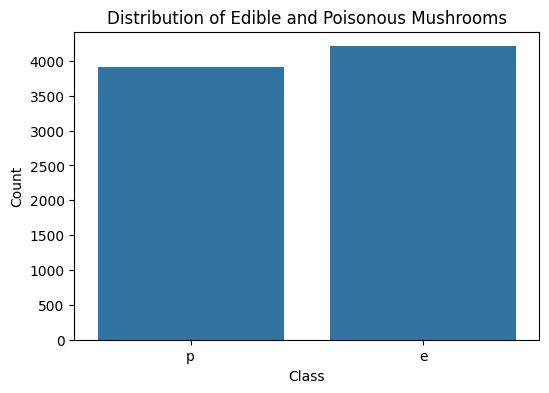

In [47]:
# 1. Visualisasi distribusi variabel target
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='class')
plt.title('Distribution of Edible and Poisonous Mushrooms')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


In [48]:
df['class'].value_counts()

,count
class,
e,4208
p,3916


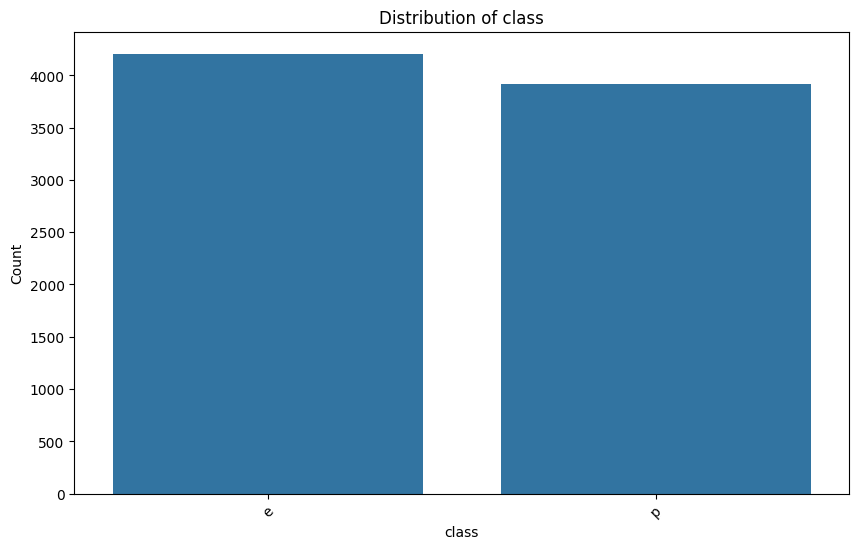


-------------------------------------------------------------------------------- End of class Visualization --------------------------------------------------------------------------------



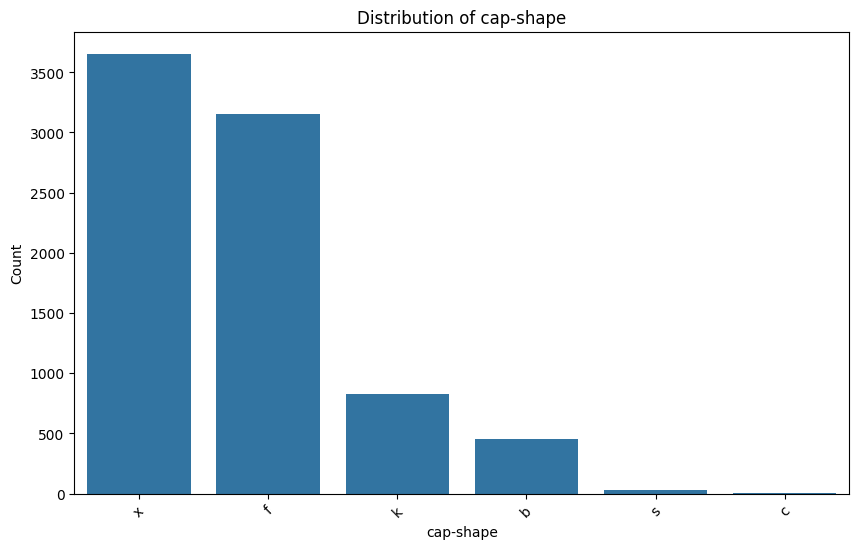


-------------------------------------------------------------------------------- End of cap-shape Visualization --------------------------------------------------------------------------------



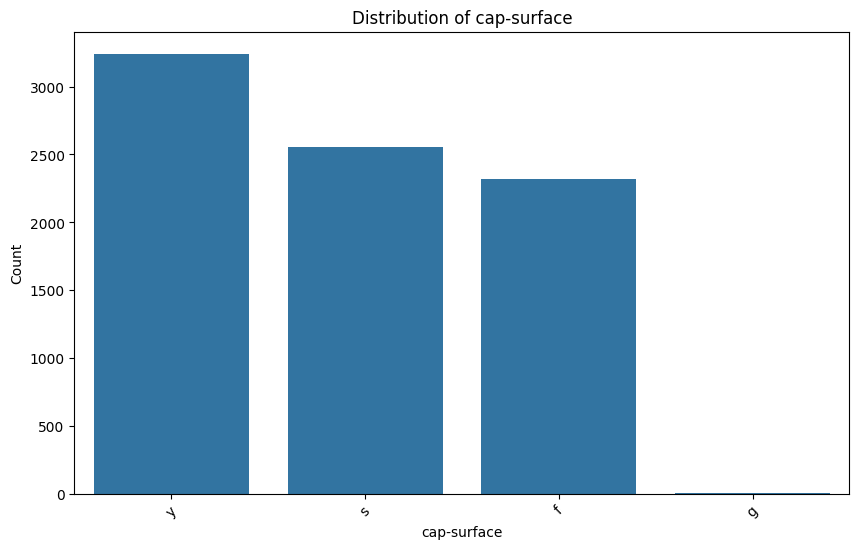


-------------------------------------------------------------------------------- End of cap-surface Visualization --------------------------------------------------------------------------------



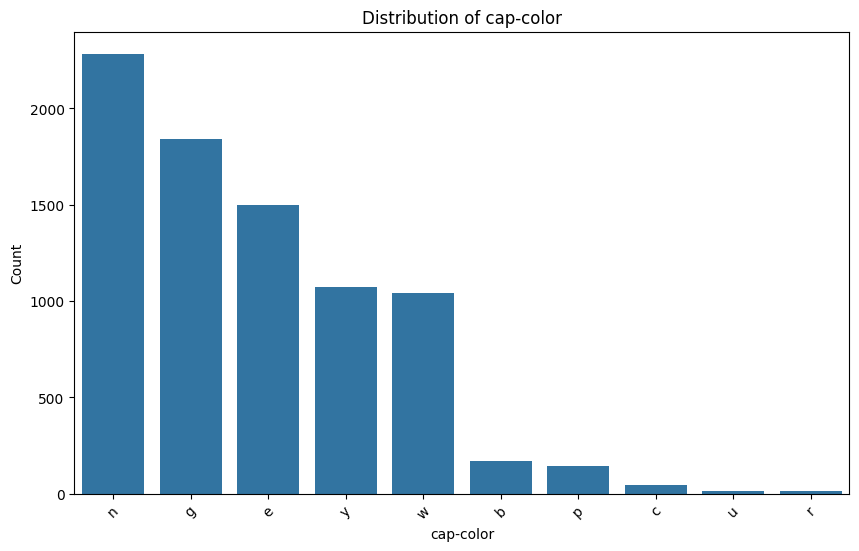


-------------------------------------------------------------------------------- End of cap-color Visualization --------------------------------------------------------------------------------



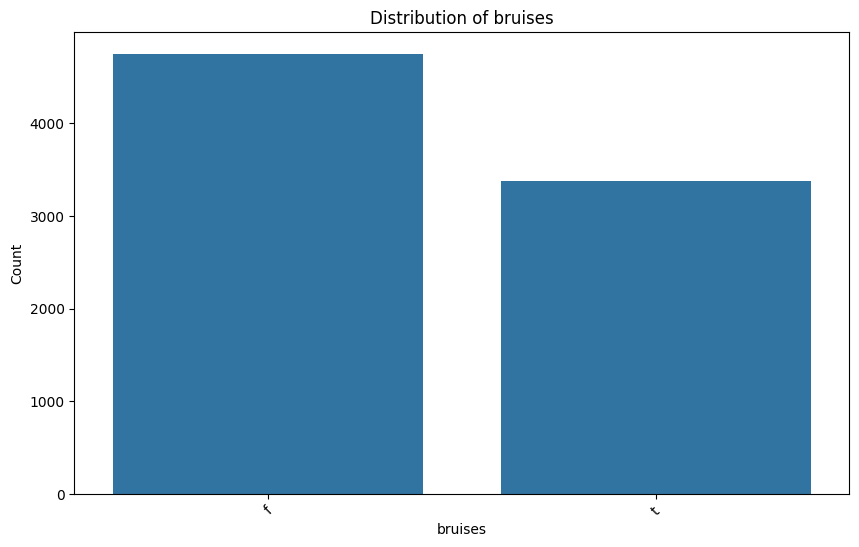


-------------------------------------------------------------------------------- End of bruises Visualization --------------------------------------------------------------------------------



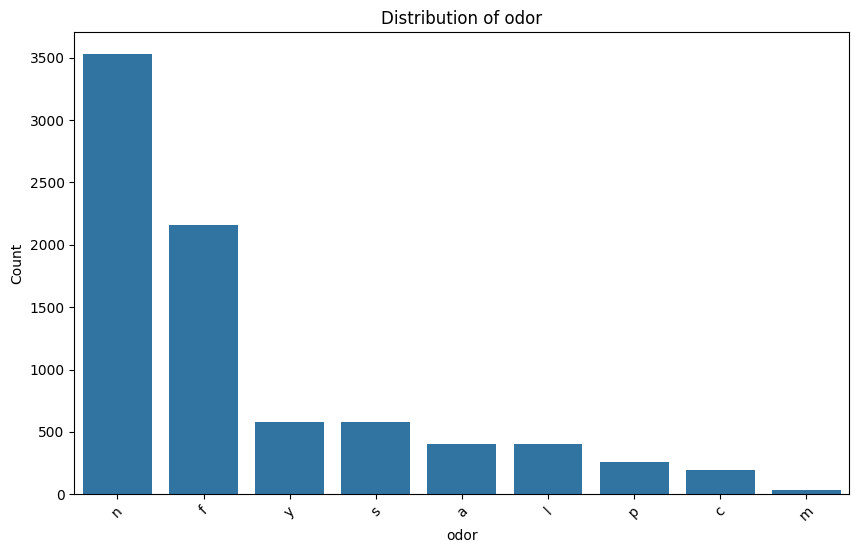


-------------------------------------------------------------------------------- End of odor Visualization --------------------------------------------------------------------------------



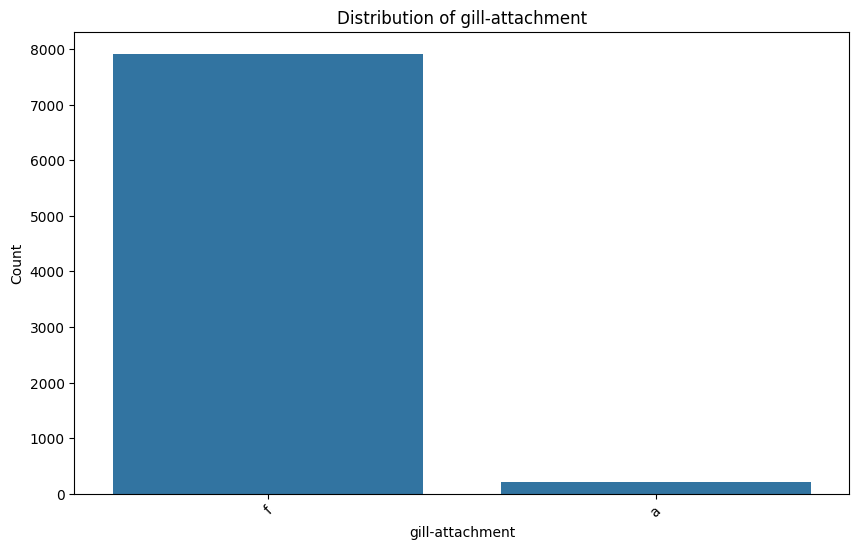


-------------------------------------------------------------------------------- End of gill-attachment Visualization --------------------------------------------------------------------------------



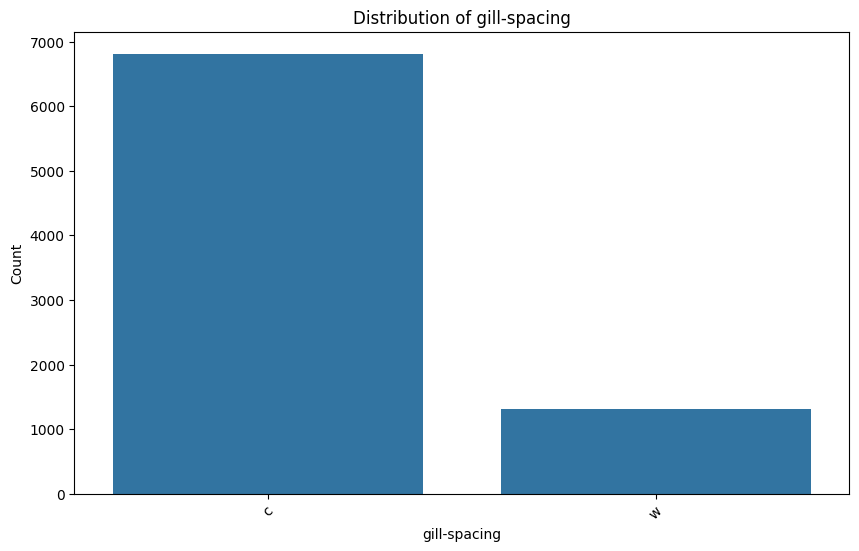


-------------------------------------------------------------------------------- End of gill-spacing Visualization --------------------------------------------------------------------------------



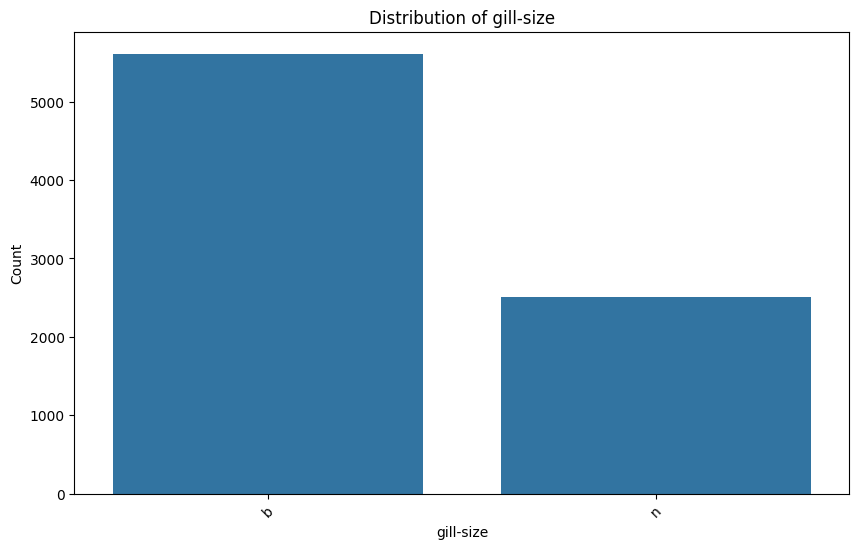


-------------------------------------------------------------------------------- End of gill-size Visualization --------------------------------------------------------------------------------



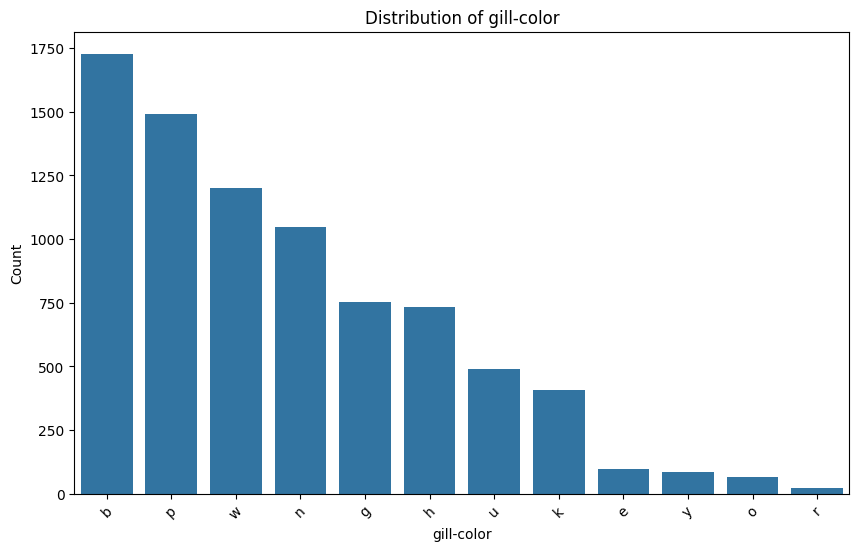


-------------------------------------------------------------------------------- End of gill-color Visualization --------------------------------------------------------------------------------



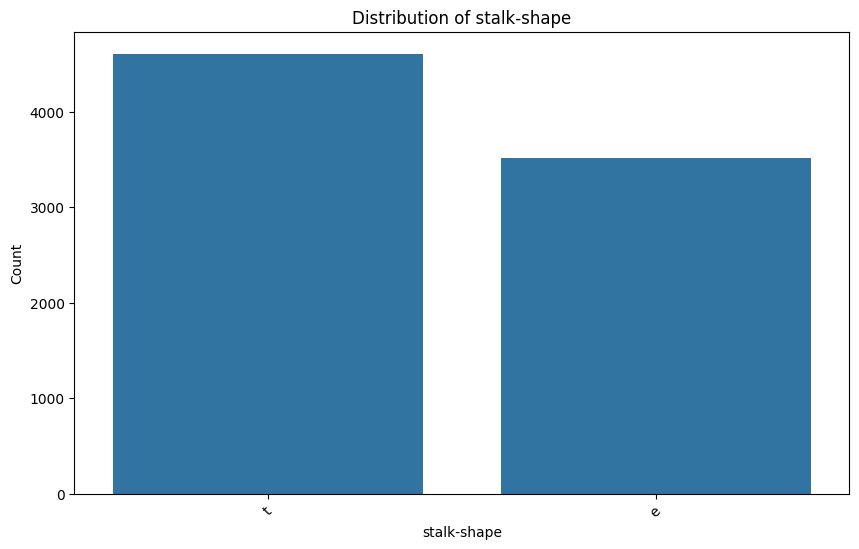


-------------------------------------------------------------------------------- End of stalk-shape Visualization --------------------------------------------------------------------------------



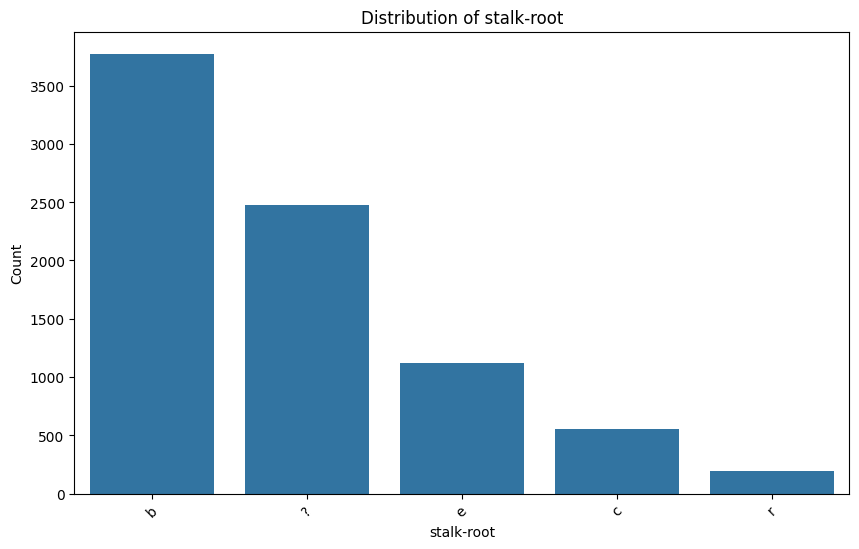


-------------------------------------------------------------------------------- End of stalk-root Visualization --------------------------------------------------------------------------------



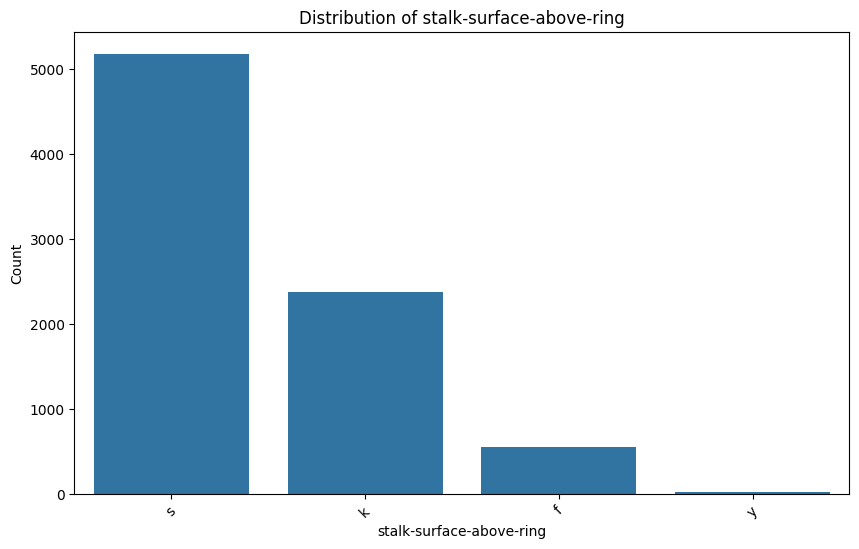


-------------------------------------------------------------------------------- End of stalk-surface-above-ring Visualization --------------------------------------------------------------------------------



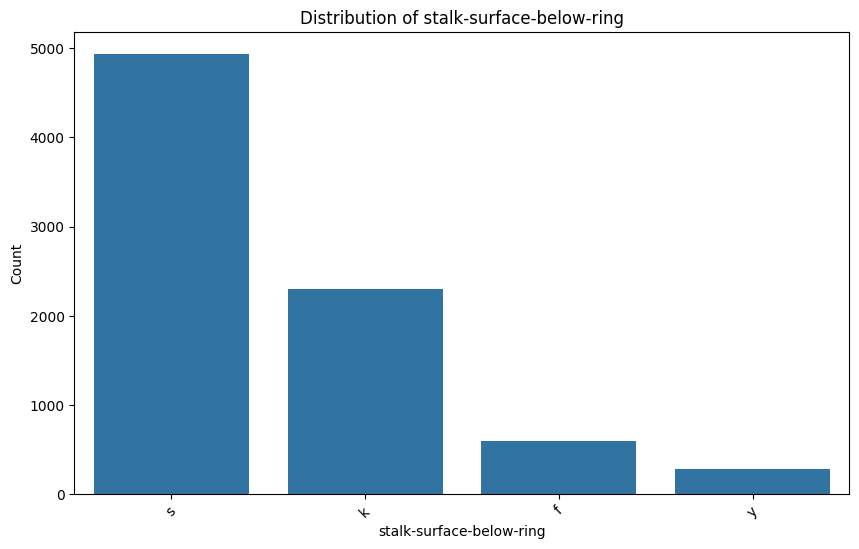


-------------------------------------------------------------------------------- End of stalk-surface-below-ring Visualization --------------------------------------------------------------------------------



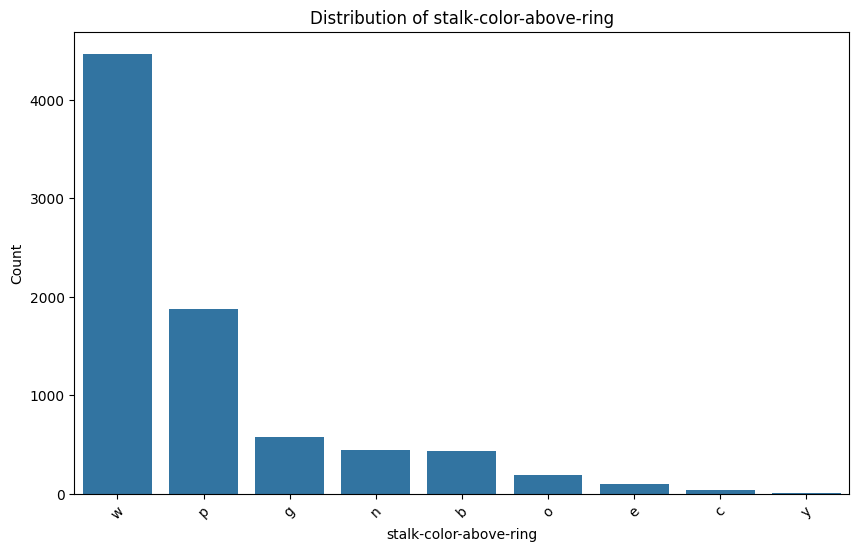


-------------------------------------------------------------------------------- End of stalk-color-above-ring Visualization --------------------------------------------------------------------------------



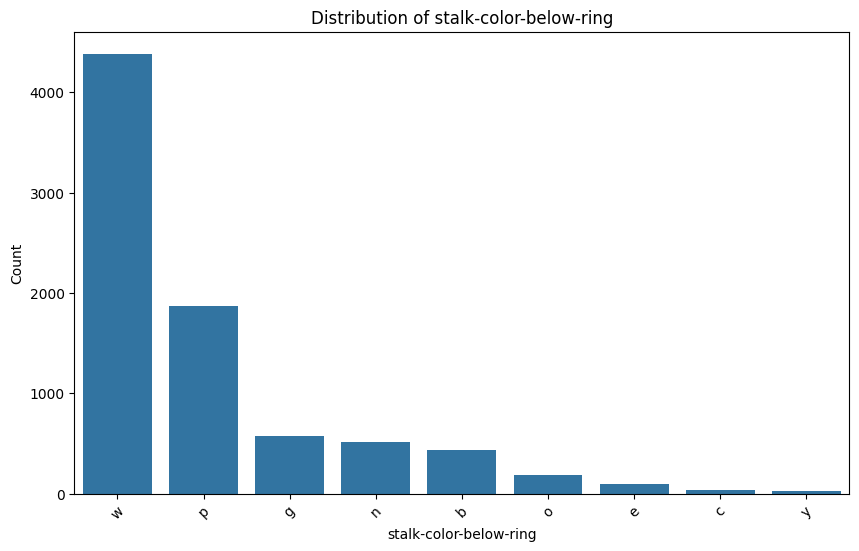


-------------------------------------------------------------------------------- End of stalk-color-below-ring Visualization --------------------------------------------------------------------------------



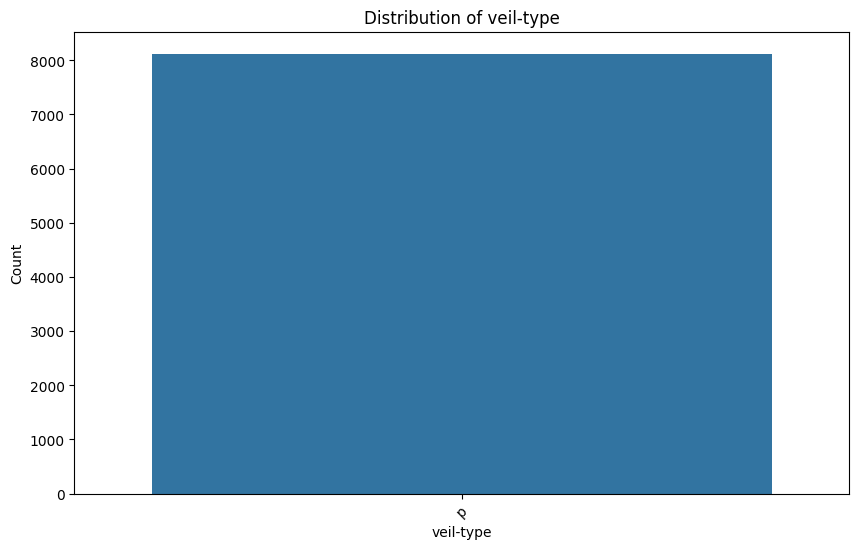


-------------------------------------------------------------------------------- End of veil-type Visualization --------------------------------------------------------------------------------



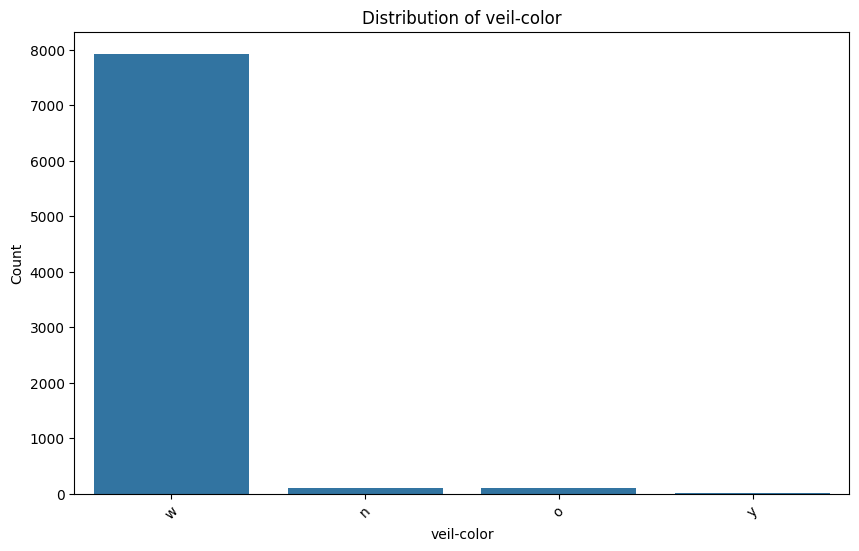


-------------------------------------------------------------------------------- End of veil-color Visualization --------------------------------------------------------------------------------



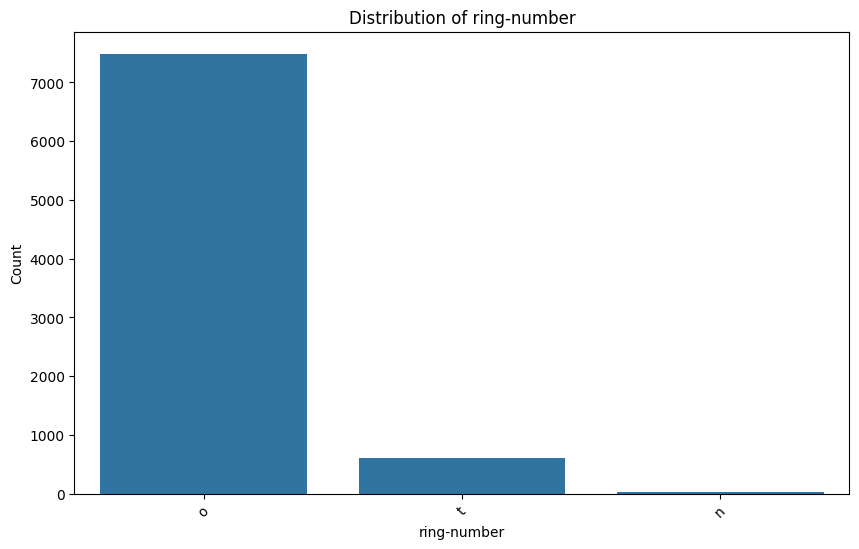


-------------------------------------------------------------------------------- End of ring-number Visualization --------------------------------------------------------------------------------



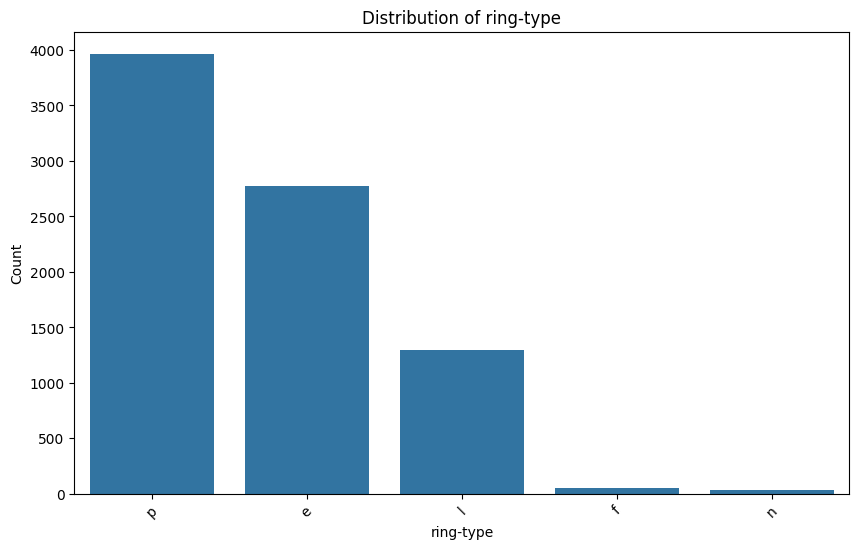


-------------------------------------------------------------------------------- End of ring-type Visualization --------------------------------------------------------------------------------



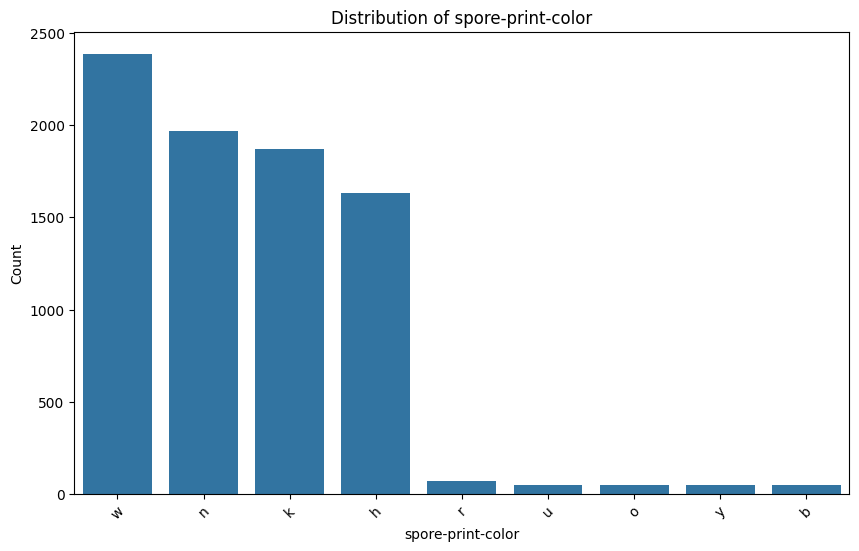


-------------------------------------------------------------------------------- End of spore-print-color Visualization --------------------------------------------------------------------------------



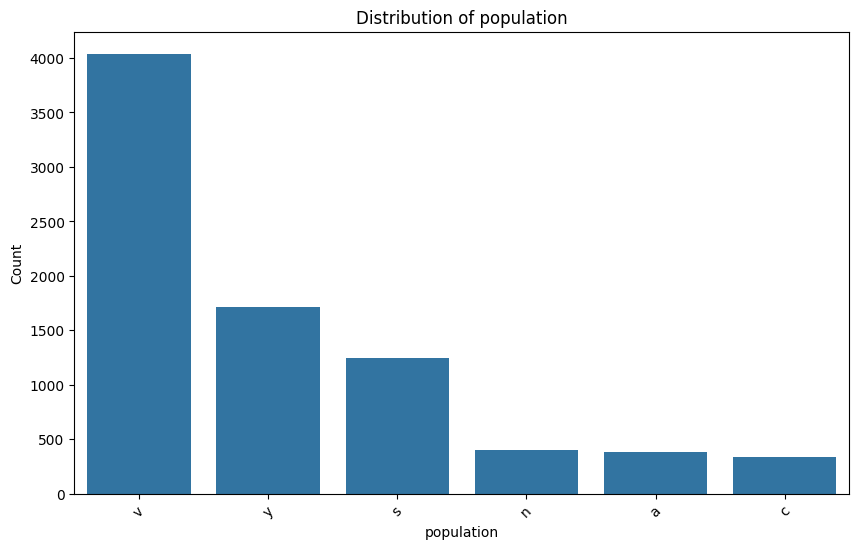


-------------------------------------------------------------------------------- End of population Visualization --------------------------------------------------------------------------------



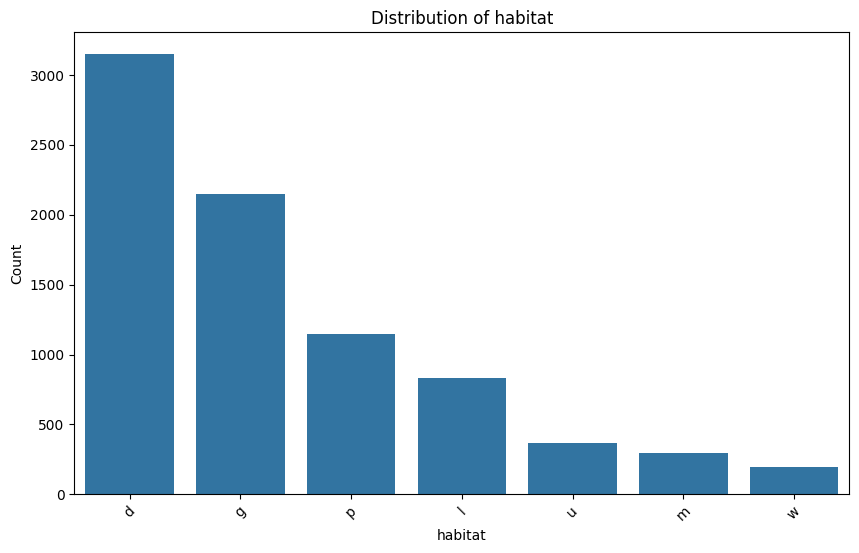


-------------------------------------------------------------------------------- End of habitat Visualization --------------------------------------------------------------------------------



In [49]:
# 2. Distribusi setiap fitur (horizontal bar plot with separation)
for column in df.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column, order=df[column].value_counts().index)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x-axis labels if needed
    plt.show()

    # Menambahkan pemisah visual antara plot
    print("\n" + "-" * 80 + f" End of {column} Visualization " + "-" * 80 + "\n")

In [50]:
# 5. Heatmap korelasi (encoding data kategorikal untuk korelasi numerik)
encoded_df = df.copy()
label_encoders = {}
for column in encoded_df.columns:
    le = LabelEncoder()
    encoded_df[column] = le.fit_transform(encoded_df[column])
    label_encoders[column] = le

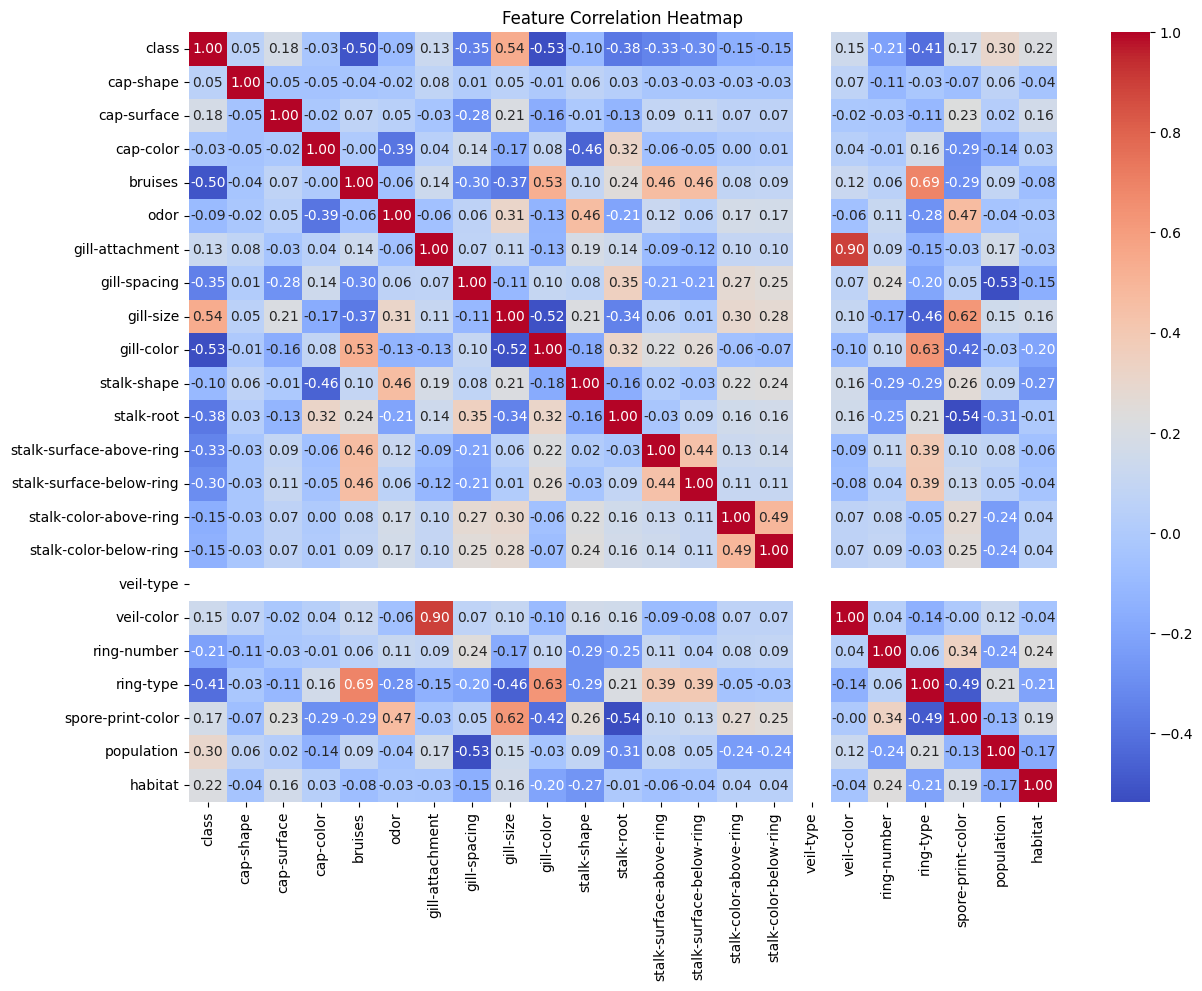

In [51]:
plt.figure(figsize=(14, 10))
sns.heatmap(encoded_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

##Data Preprocessing###


In [53]:
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

In [54]:
#Memisahkan Fitur dan Target
X = df.drop('class', axis=1) #Data Fitur
y = df['class'] #Data Target

In [55]:
# Menggunakan SMOTE untuk oversampling
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

In [56]:
# Menampilkan jumlah data pada masing-masing kelas setelah SMOTE
print("Jumlah data sebelum SMOTE:")
print(y.value_counts())

print("\nJumlah data setelah SMOTE:")
print(y_resampled.value_counts())

Jumlah data sebelum SMOTE:
class
0    4208
1    3916
Name: count, dtype: int64

Jumlah data setelah SMOTE:
class
1    4208
0    4208
Name: count, dtype: int64


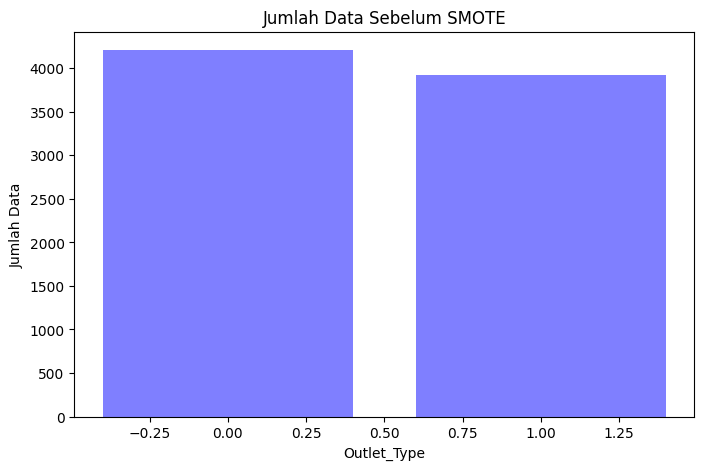

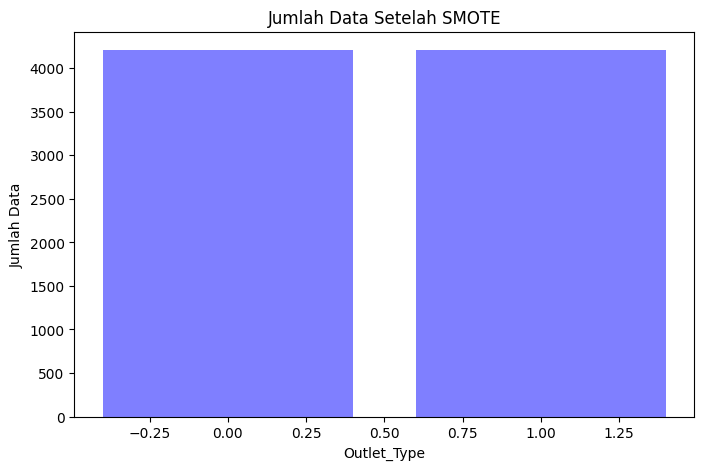

In [57]:
# Visualisasi Jumlah Data Sebelum SMOTE
plt.figure(figsize=(8, 5))
plt.bar(y.value_counts().index, y.value_counts(), color='blue', alpha=0.5)
plt.xlabel('Outlet_Type')
plt.ylabel('Jumlah Data')
plt.title('Jumlah Data Sebelum SMOTE')
plt.show()

# Visualisasi Jumlah Data Setelah SMOTE
plt.figure(figsize=(8, 5))
plt.bar(y_resampled.value_counts().index, y_resampled.value_counts(), color='blue', alpha=0.5)
plt.xlabel('Outlet_Type')
plt.ylabel('Jumlah Data')
plt.title('Jumlah Data Setelah SMOTE')
plt.show()

##Select Feature

In [58]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [59]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<ipython-input-60-fa39ee5de389>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette="viridis")


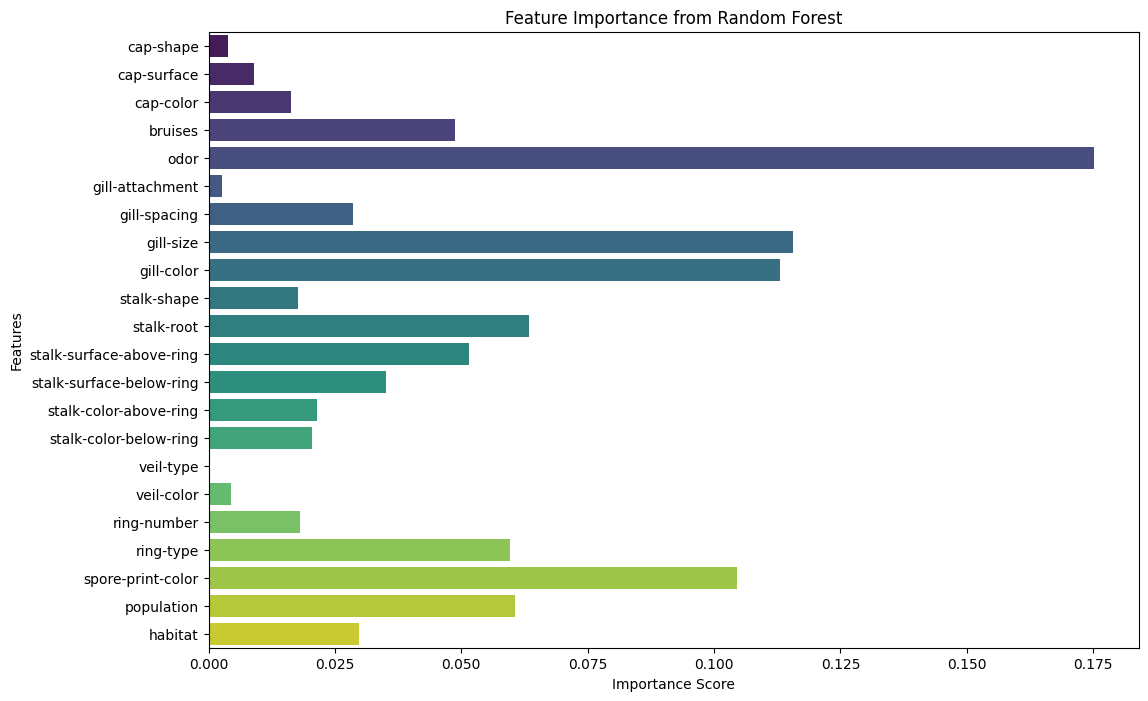


Selected Features: ['bruises', 'odor', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'ring-type', 'spore-print-color', 'population', 'habitat']


In [60]:
from sklearn.feature_selection import SelectFromModel

# Feature Selection using Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
importances = rf_model.feature_importances_
feature_names = X.columns

# Visualize feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x=importances, y=feature_names, palette="viridis")
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# Select features using a threshold
selector = SelectFromModel(rf_model, prefit=True, threshold=0.02)  # Threshold bisa disesuaikan
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Print selected features
selected_features = X.columns[selector.get_support()]
print("\nSelected Features:", list(selected_features))

##Modelling

###Random Forest###

In [61]:
# Random Forest Model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest:\n", classification_report(y_test, y_pred_rf))

Random Forest:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       836
           1       1.00      1.00      1.00       848

    accuracy                           1.00      1684
   macro avg       1.00      1.00      1.00      1684
weighted avg       1.00      1.00      1.00      1684



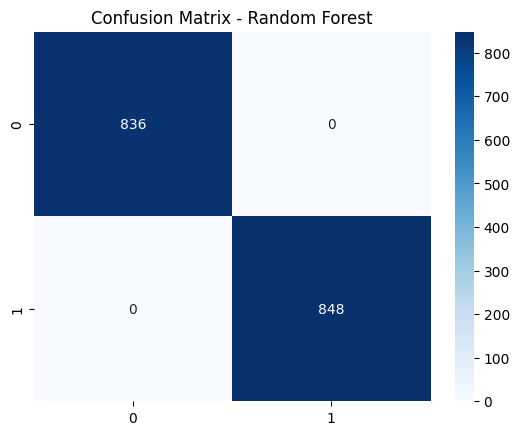

In [62]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.show()

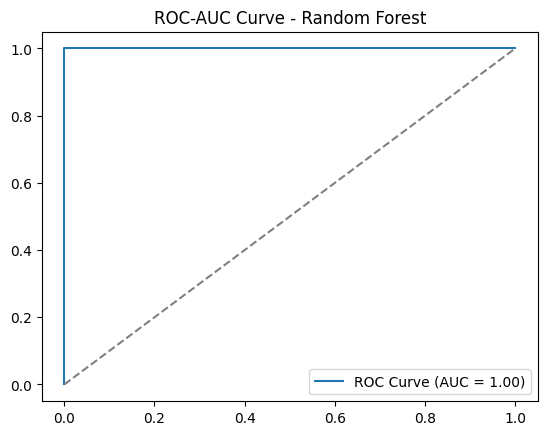

In [63]:
# ROC Curve
y_pred_prob_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, label=f'ROC Curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC-AUC Curve - Random Forest')
plt.legend()
plt.show()

In [64]:
from sklearn.model_selection import cross_val_score

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf_cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')


print(f"Random Forest CV Scores: {rf_cv_scores}")
print(f"Random Forest Average Accuracy: {np.mean(rf_cv_scores):.4f}")


Random Forest CV Scores: [0.84246154 1.         1.         1.         0.58435961]
Random Forest Average Accuracy: 0.8854


###Logistic regresion


In [65]:
# Logistic Regression Model
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression:\n", classification_report(y_test, y_pred_lr))


Logistic Regression:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95       836
           1       0.95      0.96      0.96       848

    accuracy                           0.96      1684
   macro avg       0.96      0.96      0.96      1684
weighted avg       0.96      0.96      0.96      1684



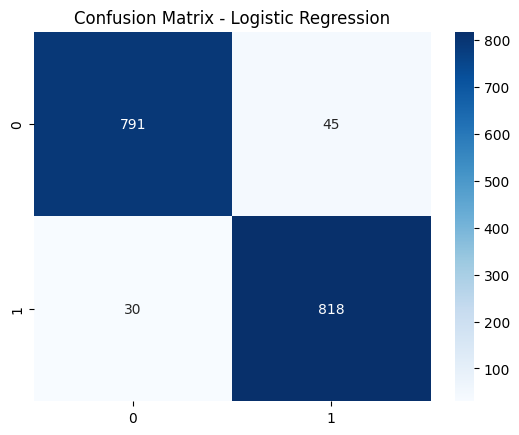

In [66]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

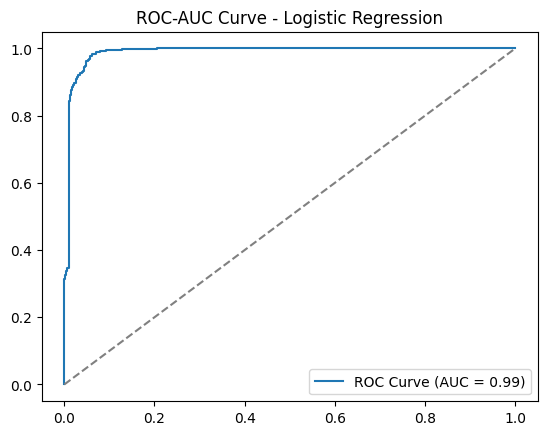

In [67]:
# ROC Curve
y_pred_prob_lr = lr.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.plot(fpr_lr, tpr_lr, label=f'ROC Curve (AUC = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC-AUC Curve - Logistic Regression')
plt.legend()
plt.show()

In [68]:
## cross-validation
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_cv_scores = cross_val_score(lr_model, X, y, cv=5, scoring='accuracy')

print(f"Logistic Regression CV Scores: {lr_cv_scores}")
print(f"Logistic Regression Average Accuracy: {np.mean(lr_cv_scores):.4f}")

Logistic Regression CV Scores: [0.64184615 0.98338462 0.87569231 0.99815385 0.65270936]
Logistic Regression Average Accuracy: 0.8304


###SVM

In [69]:
# SVM Model
svm = SVC(probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM:\n", classification_report(y_test, y_pred_svm))



SVM:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       836
           1       1.00      1.00      1.00       848

    accuracy                           1.00      1684
   macro avg       1.00      1.00      1.00      1684
weighted avg       1.00      1.00      1.00      1684



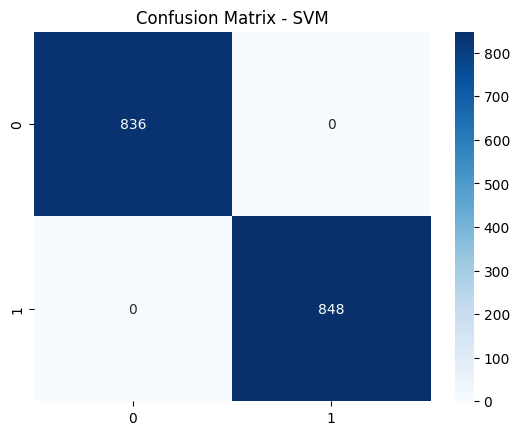

In [70]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - SVM')
plt.show()


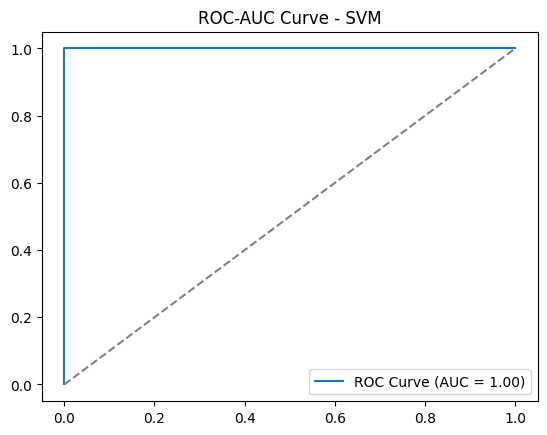

In [71]:
# ROC Curve
y_pred_prob_svm = svm.predict_proba(X_test)[:, 1]
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)
plt.plot(fpr_svm, tpr_svm, label=f'ROC Curve (AUC = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC-AUC Curve - SVM')
plt.legend()
plt.show()

In [72]:

svm_model = SVC(random_state=42)

svm_cv_scores = cross_val_score(svm_model, X, y, cv=5, scoring='accuracy')


print(f"SVM CV Scores: {svm_cv_scores}")
print(f"SVM Average Accuracy: {np.mean(svm_cv_scores):.4f}")

SVM CV Scores: [0.81292308 0.99507692 0.89907692 1.         0.49938424]
SVM Average Accuracy: 0.8413


###XGBOOST

In [73]:
# XGBoost Model
xgb = XGBClassifier( eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print("XGBoost:\n", classification_report(y_test, y_pred_xgb))

XGBoost:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       836
           1       1.00      1.00      1.00       848

    accuracy                           1.00      1684
   macro avg       1.00      1.00      1.00      1684
weighted avg       1.00      1.00      1.00      1684



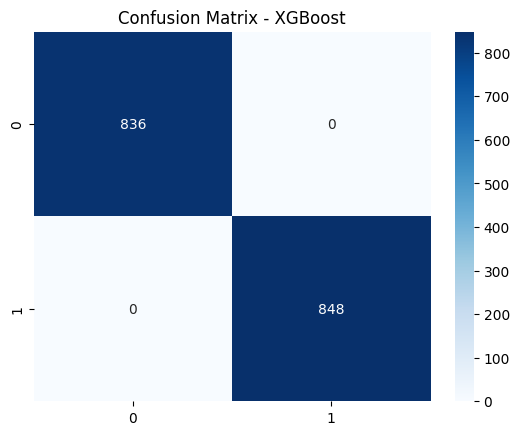

In [74]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - XGBoost')
plt.show()


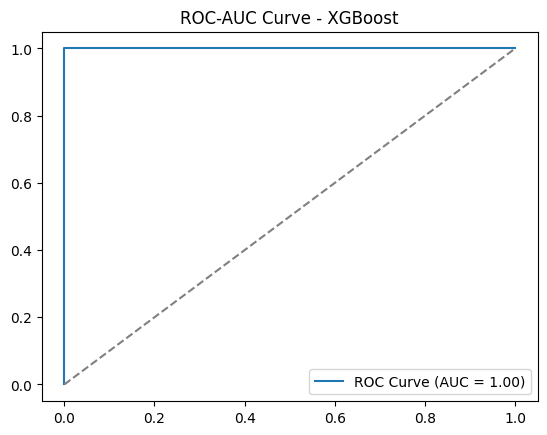

In [75]:
# ROC Curve
y_pred_prob_xgb = xgb.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
plt.plot(fpr_xgb, tpr_xgb, label=f'ROC Curve (AUC = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC-AUC Curve - XGBoost')
plt.legend()
plt.show()


###Naive bayes

In [78]:
# Naive Bayes Model
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print("Naive Bayes:\n", classification_report(y_test, y_pred_nb))



Naive Bayes:
               precision    recall  f1-score   support

           0       0.93      0.92      0.92       841
           1       0.91      0.92      0.92       783

    accuracy                           0.92      1624
   macro avg       0.92      0.92      0.92      1624
weighted avg       0.92      0.92      0.92      1624



In [79]:

nb_model = GaussianNB()
nb_cv_scores = cross_val_score(nb_model, X, y, cv=5, scoring='accuracy')


print(f"Naive Bayes CV Scores: {nb_cv_scores}")
print(f"Naive Bayes Average Accuracy: {np.mean(nb_cv_scores):.4f}")

Naive Bayes CV Scores: [0.72923077 0.96123077 0.79261538 0.65230769 0.49445813]
Naive Bayes Average Accuracy: 0.7260


###Decision tree

In [80]:
# Decision Tree Model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree:\n", classification_report(y_test, y_pred_dt))

Decision Tree:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       841
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1624
   macro avg       1.00      1.00      1.00      1624
weighted avg       1.00      1.00      1.00      1624



In [81]:

dt_model = DecisionTreeClassifier(random_state=42)
dt_cv_scores = cross_val_score(dt_model, X, y, cv=5, scoring='accuracy')


print(f"Decision Tree CV Scores: {dt_cv_scores}")
print(f"Decision Tree Average Accuracy: {np.mean(dt_cv_scores):.4f}")

Decision Tree CV Scores: [0.88184615 1.         1.         1.         0.92610837]
Decision Tree Average Accuracy: 0.9616
